In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts

<bound method IndexOpsMixin.value_counts of 0         19525.0
1         19446.0
2         19401.0
3         19401.0
4             NaN
           ...   
289235        NaN
289236        NaN
289237    19038.0
289238    19027.0
289239    19406.0
Name: zip, Length: 289240, dtype: float64>

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [9]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [10]:
x=df['title'].iloc[0]
x.split(':')[0]

'EMS'

In [11]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [12]:
df['Reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

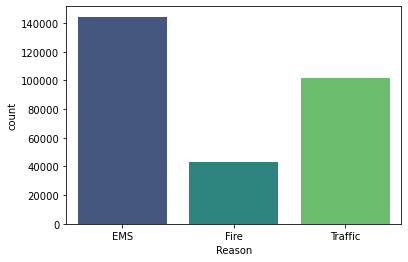

In [15]:
sns.countplot(x='Reason',data=df,palette='viridis')

## let us begin to focus on time information

In [16]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [17]:
# convert the coloumns from strings to date time object

df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [18]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [20]:
time.month

12

In [21]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [22]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
289235    11
289236    11
289237    11
289238    11
289239    11
Name: Hour, Length: 289240, dtype: int64

In [23]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)


In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


# lets map strings to actual days of week


In [25]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


# using seaborn to create a countplot of the day of week coloumn with hue based off the reason column

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

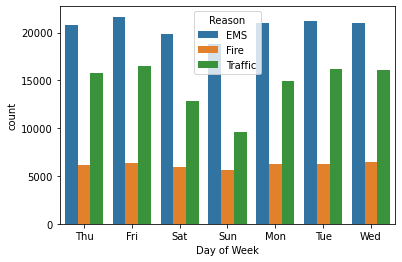

In [28]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

In [29]:
byMonth=df.groupby('Month').count()

In [30]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


<AxesSubplot:xlabel='Month'>

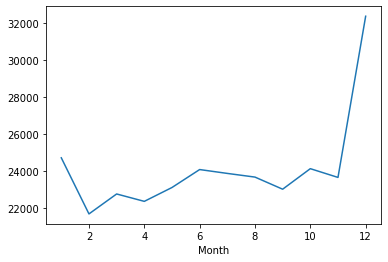

In [31]:
byMonth['lat'].plot()

NameError: name 'bbox_to_anchor' is not defined

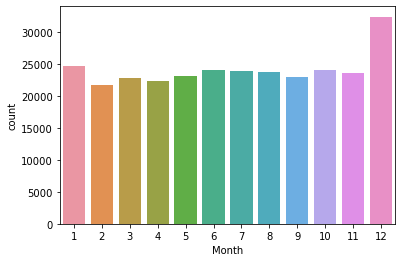

In [32]:
sns.countplot(x='Month',data=df)
plt.legend(bbox_to_anchor(1.05,1),loc=2,borderaxespad=0)

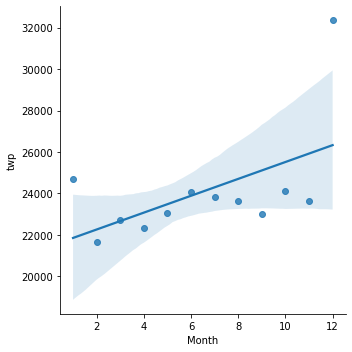

In [33]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [34]:
t=df['timeStamp'].iloc[0]

In [35]:
t

Timestamp('2015-12-10 17:10:52')

In [36]:
t.date()

datetime.date(2015, 12, 10)

In [37]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


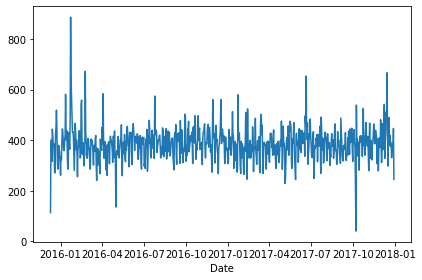

In [39]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

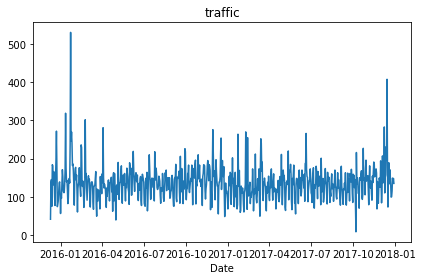

In [41]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('traffic')
plt.tight_layout()

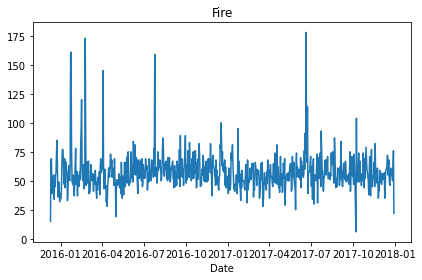

In [43]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

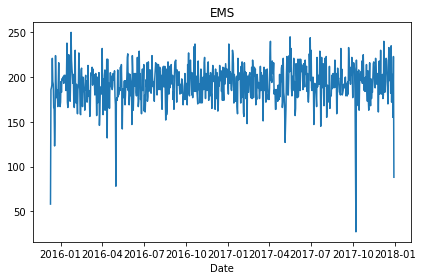

In [44]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [48]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

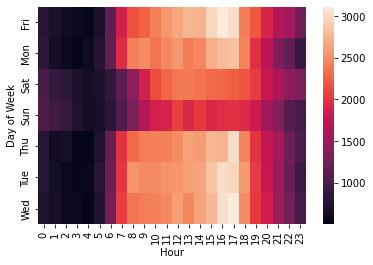

In [49]:
sns.heatmap(dayHour)

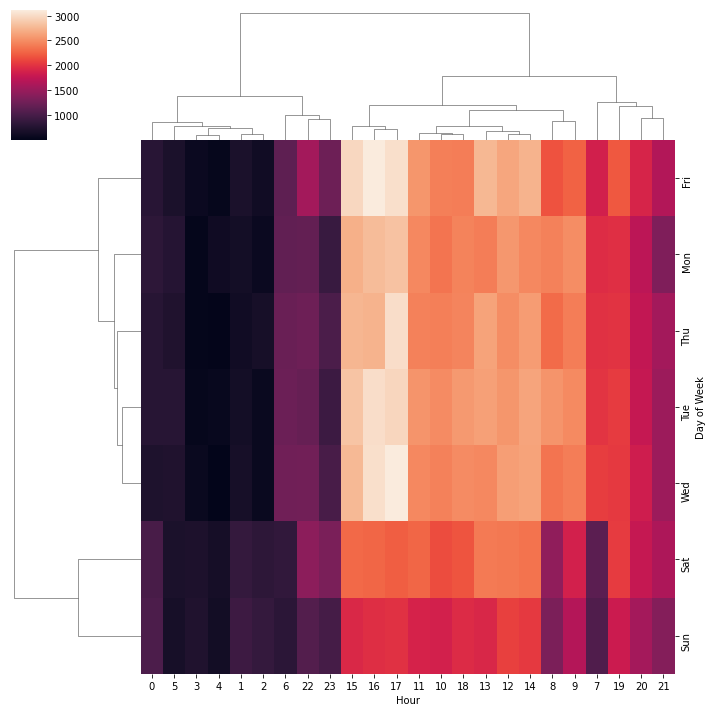

In [50]:
sns.clustermap(dayHour)